In [23]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#Load data

In [24]:
df = pd.read_csv("21882974-heart-disease.csv") # 'DataFrame' shortened to 'df'
df.shape # (rows, columns)
df.target.value_counts(normalize=True)  # check for status in percentage

1    0.544554
0    0.455446
Name: target, dtype: float64

Bar Graph

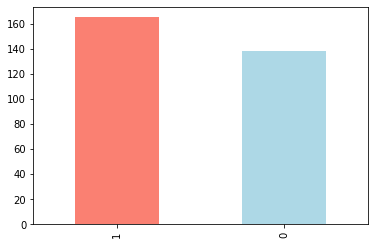

In [25]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Heart Disease Frequency according to Gender

In [27]:
df.sex.value_counts() # 1 for male 

1    207
0     96
Name: sex, dtype: int64

**CrossTab**

In [28]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


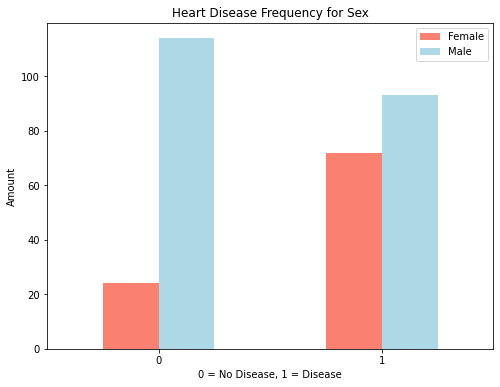

In [29]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(8,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

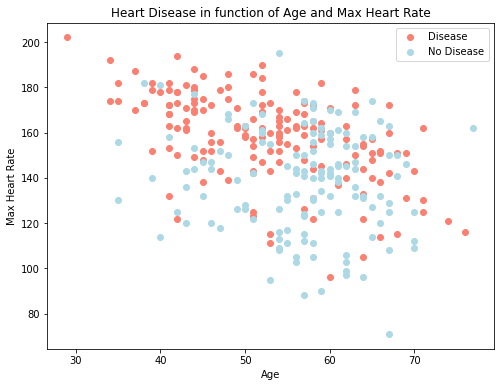

In [30]:
#Age and maximum heart rate  plot we use Scatter plot

# Create another figure
plt.figure(figsize=(8,6))

# Start with positve examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0],df.thalach[df.target==0], c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

**Heart Disease Frequency per Chest Pain Type**

In [31]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


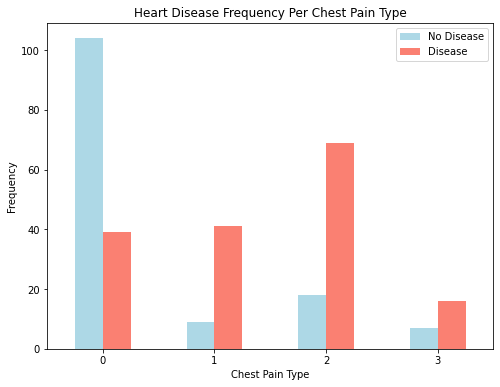

In [32]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar",figsize=(8,6),color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

#MODELING

In [33]:
# Everything except target variable
X = df.drop("target", axis=1)
# Target variable
y = df.target.values

**TRAIN AND TEST SPLIT**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=0)

**FEATURE SCALING**

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-1.49122762  0.71537732  0.98570103 ... -0.67386191 -0.69989647
  -0.45936486]
 [-0.49950551  0.71537732  0.98570103 ... -0.67386191  0.28841888
   1.15785116]
 [ 0.16164256 -1.39786372 -0.94807885 ... -0.67386191  1.27673422
   1.15785116]
 ...
 [ 0.16164256  0.71537732  1.95259096 ... -0.67386191 -0.69989647
   1.15785116]
 [-0.83007955  0.71537732  0.98570103 ...  0.95993537 -0.69989647
  -0.45936486]
 [ 0.38202525  0.71537732  0.01881109 ... -0.67386191 -0.69989647
  -0.45936486]]


**TRANING BY SVC MODEL**

In [48]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

**ACCURACY OF SVC MODEL**

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[20  3]
 [ 3 20]]


0.8695652173913043

**TRANING IN KNN MODEL**

In [55]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

**ACCURACY  OF KNN MODEL**

In [56]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[19  4]
 [ 2 21]]


0.8695652173913043

**TRANING IN RANDOM FOREST**

In [65]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

**ACCURACY OF RANDOM FOREST**

In [66]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[20  3]
 [ 9 14]]


0.7391304347826086

**TRANING BY LOGISTIC REGRESSION**

In [59]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

ACCURACY OF LOGISTIC REGRESSION

In [60]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[19  4]
 [ 3 20]]


0.8478260869565217

#TUNING

**KNN BY HANDS**

In [53]:
train_scores = []
# Create a list of test scores
test_scores = []
# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20
# Setup algorithm
knn = KNeighborsClassifier()
# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    # Fit the algorithm
    knn.fit(X_train, y_train)
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

**PLOT FOR TRAIN TEST (TUNED)**

Maximum KNN score on the test data: 86.96%


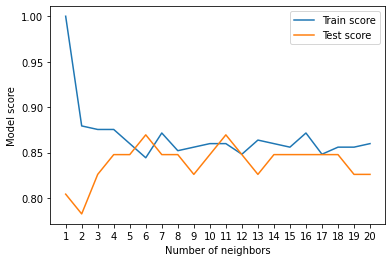

In [54]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

**Tuning RF model with with RandomizedSearchCV**

In [61]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

*Random Forest Classifier*

In [67]:
np.random.seed(42)
# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [68]:
rs_rf.score(X_test, y_test)

0.8478260869565217

**Tuning LR model with GridSearchCV**

In [69]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [70]:
gs_log_reg.score(X_test, y_test)

0.8695652173913043

As we can see every models accuracy has increases slightely by Tuning

#EVALUATING MODELS BEYOND ACCURACY

In [71]:
y_preds = gs_log_reg.predict(X_test)

*ROC Curve*

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


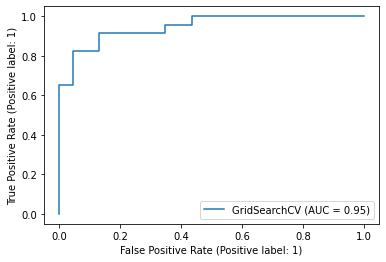

In [72]:
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

Confusion Matrix(Beautified)

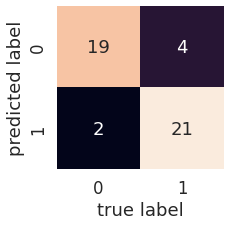

In [73]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

*Classification Report*

In [74]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        23
           1       0.84      0.91      0.87        23

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



**CROSS VALIDATION**

We got our score but these were all calculated using a single training and test set.What we'll do to make them more solid is calculate them using cross-validation.

In [76]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.012742749857031334, 'solver': 'liblinear'}

In [75]:
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,solver="liblinear")

Accuracy


In [78]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf, X, y,cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
# We will get a metrix of 5 so we take average
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

Precision

In [80]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,X,y,cv=5,scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

Recall

In [82]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,X,y,cv=5,scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

F1 Score

In [83]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,X,y,cv=5,scoring="f1")) # recall as scoring
cv_f1

0.8705403543192143

VISUALIZE THESE SCORES

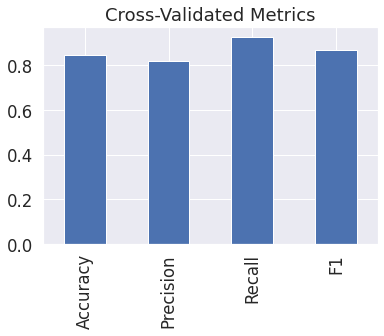

In [87]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics",legend=False);

#Feature Importance

Now at last Feature importance

In [88]:
clf.fit(X_train, y_train);

In [89]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': -0.07598980059938666,
 'sex': -0.700959233904906,
 'cp': 0.6878469172619857,
 'trestbps': -0.20003454118853584,
 'chol': -0.16307353310129807,
 'fbs': -0.08261711395057372,
 'restecg': 0.08488453914998798,
 'thalach': 0.3768843307962153,
 'exang': -0.4322780178009644,
 'oldpeak': -0.49509651374071284,
 'slope': 0.2369096055460251,
 'ca': -0.8074618456226057,
 'thal': -0.4404679317172108}

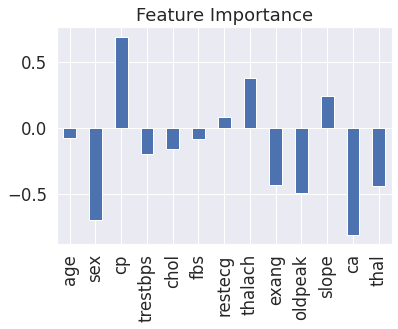

In [90]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [91]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [92]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


*The End*